In [69]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.utils import all_estimators
import warnings
warnings.filterwarnings('ignore')

In [70]:
features = ["Sex", "Length", "Diameter continuous","Height",
    "Whole weight","Shucked weight","Viscera weight","Shell weight","Rings"]
    
df_data = pd.read_csv("/Users/iseojun/Desktop/2학년 1학기/인공지능프로그래밍/abalone.csv")
df_data = df_data.to_numpy()
df = pd.DataFrame(df_data, columns=features)
df.head()

,Sex,Length,Diameter continuous,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
1,F,0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
2,M,0.44,0.365,0.125,0.516,0.2155,0.114,0.155,10
3,I,0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7
4,I,0.425,0.3,0.095,0.3515,0.141,0.0775,0.12,8


In [71]:
df.keys()

Index(['Sex', 'Length', 'Diameter continuous', 'Height', 'Whole weight',
       'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df.columns :
    df[i] = le.fit_transform(df[i])

In [73]:
df.head()

,Sex,Length,Diameter continuous,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,45,36,17,285,178,94,113,6
1,0,81,67,26,962,480,280,374,8
2,2,63,56,24,718,400,225,273,9
3,1,41,34,15,253,159,76,87,6
4,1,60,43,18,463,254,152,207,7


In [74]:
df.isnull().sum()

Sex                    0
Length                 0
Diameter continuous    0
Height                 0
Whole weight           0
Shucked weight         0
Viscera weight         0
Shell weight           0
Rings                  0
dtype: int64

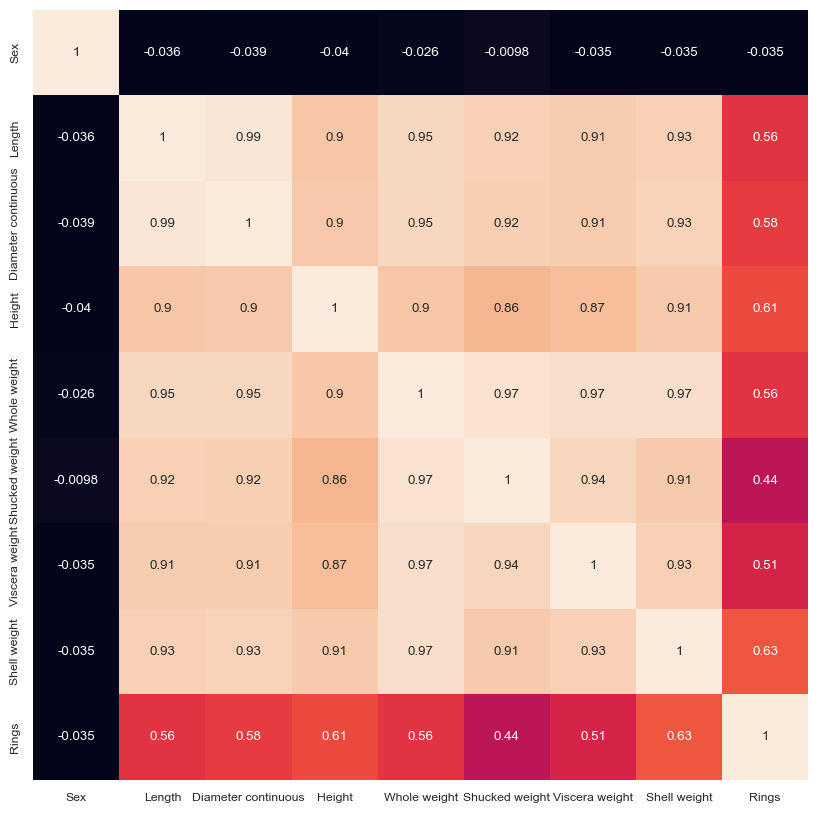

In [75]:
import matplotlib.pyplot as plt
#상관 관계 행렬
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [76]:
X = df.drop('Shell weight', axis=1)
y = df['Shell weight']
Y = pd.get_dummies(y).values

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (8,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                576       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


In [79]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
105/105 [==============================] - 0s 786us/step - loss: 1302.1556 - mse: 1302.1556 - val_loss: 112.3009 - val_mse: 112.3009
Epoch 2/100
105/105 [==============================] - 0s 449us/step - loss: 197.3783 - mse: 197.3783 - val_loss: 58.6427 - val_mse: 58.6427
Epoch 3/100
105/105 [==============================] - 0s 440us/step - loss: 168.1945 - mse: 168.1945 - val_loss: 4.4091 - val_mse: 4.4091
Epoch 4/100
105/105 [==============================] - 0s 437us/step - loss: 152.8506 - mse: 152.8506 - val_loss: 6.3259 - val_mse: 6.3259
Epoch 5/100
105/105 [==============================] - 0s 433us/step - loss: 135.1367 - mse: 135.1367 - val_loss: 1.9369 - val_mse: 1.9369
Epoch 6/100
105/105 [==============================] - 0s 432us/step - loss: 111.2664 - mse: 111.2664 - val_loss: 100.0140 - val_mse: 100.0140
Epoch 7/100
105/105 [==============================] - 0s 431us/step - loss: 102.3747 - mse: 102.3747 - val_loss: 56.8784 - val_mse: 56.8784
Epoch 8/100
1

105/105 [==============================] - 0s 432us/step - loss: 0.0665 - mse: 0.0665 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 61/100
105/105 [==============================] - 0s 429us/step - loss: 0.0564 - mse: 0.0564 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 62/100
105/105 [==============================] - 0s 431us/step - loss: 0.0366 - mse: 0.0366 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 63/100
105/105 [==============================] - 0s 435us/step - loss: 0.0491 - mse: 0.0491 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 64/100
105/105 [==============================] - 0s 432us/step - loss: 0.0378 - mse: 0.0378 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 65/100
105/105 [==============================] - 0s 433us/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 66/100
105/105 [==============================] - 0s 430us/step - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 67/100
105/105 [==============================] - 0s 43

In [80]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

27/27 [==============================] - 0s 309us/step - loss: 0.0012 - mse: 0.0012


In [81]:
test_mse_score

0.0011768833501264453

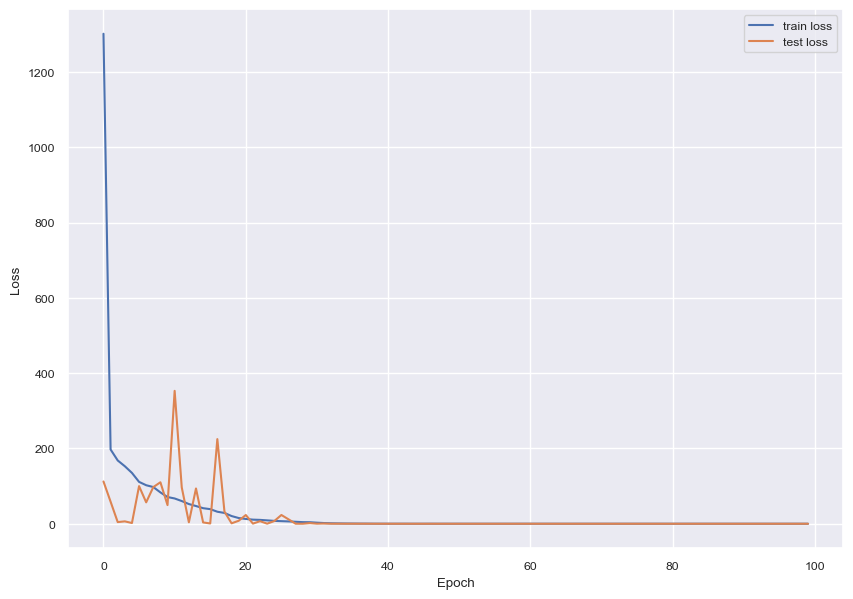

In [82]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

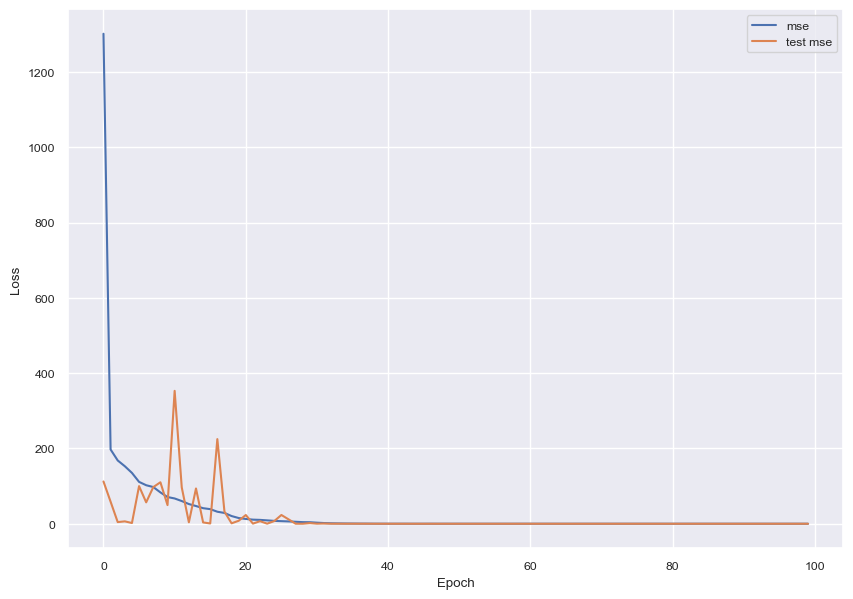

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()